Variable: potential_radiation
Contains NaNs: False
Number of NaN pixels: 0


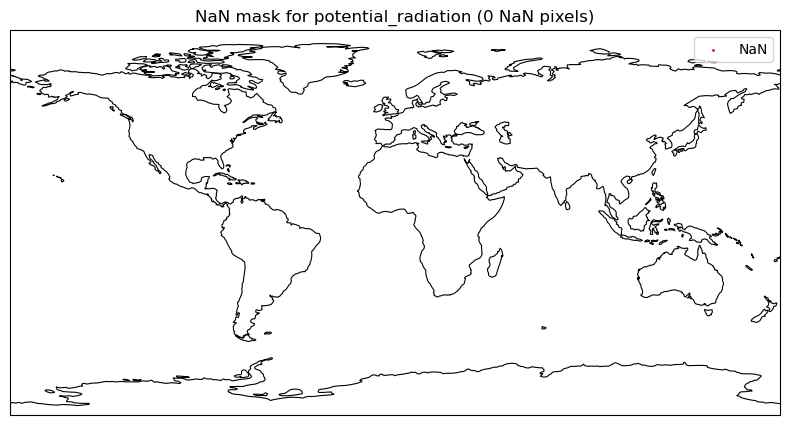

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# --- Load dataset ---
path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/preprocessed/1x1/historical/twenty_year_files/potential_radiation/potential_radiation_1901-1920.nc"
ds = xr.open_dataset(path)

# --- Pick a variable (first data var if unsure) ---
varname = list(ds.data_vars)[0]
da = ds[varname]

# --- Compute NaN mask (2D) ---
if "time" in da.dims:
    nan_mask = np.isnan(da).any(dim="time")  # pixel is True if ever NaN
else:
    nan_mask = np.isnan(da)

# --- Count NaNs ---
n_nan = int(nan_mask.sum().values)
has_nans = n_nan > 0
print(f"Variable: {varname}")
print(f"Contains NaNs: {has_nans}")
print(f"Number of NaN pixels: {n_nan:,}")

# --- Extract lat/lon coordinates ---
lat = ds["lat"] if "lat" in ds else ds["latitude"]
lon = ds["lon"] if "lon" in ds else ds["longitude"]

# --- Plot NaN mask ---
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color="black", linewidth=0.8)

y, x = np.where(nan_mask)
ax.scatter(lon.values[x], lat.values[y],
           color="red", s=1, transform=ccrs.PlateCarree(), label="NaN")

plt.title(f"NaN mask for {varname} ({n_nan:,} NaN pixels)")
plt.legend()
plt.show()